In [5]:
#Drive'a erişilmesi
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
#Kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os
import tensorflow as tf

In [7]:
#Veri setindeki klasörlerin kontrolü
import os
print(os.listdir("/gdrive/My Drive/YAZ20411/AkcigerVeriSeti"))

['training', 'test', 'validation']


In [8]:
#Veri setinin okunması
DATADIR = '/gdrive/My Drive/YAZ20411/AkcigerVeriSeti/training/'

CATEGORIES = ["Adenokarsinom","İyiHuyluDoku","SkuamozHucreKarsinomasi"]

In [9]:
#Resim boyutunun belirlenmesi
IMG_SIZE = 100

In [10]:
#Verilerin okunması
all_data =[]

def create_all_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                all_data.append([new_array,class_num])
            except Exception as e:
                pass
create_all_data()

In [11]:
#Toplam görüntü sayısının yazdırılması
print("Toplam Görüntü Sayısı: ", len(all_data))

Toplam Görüntü Sayısı:  15000


In [12]:
#Verilerin kategori ve etiket olarak ayrılması
X = []
y = []

for categories, label in all_data:
  X.append(categories)
  y.append(label)

In [13]:
#Verilerin eğitim ve test olarak ayrılması
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [14]:
#Verilerin boyutlarının şekillendirilmesi
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [15]:
#Verilerin boyutlarının yazdırılması
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(10800, 100, 100, 3)
(3000, 100, 100, 3)
(1200, 100, 100, 3)
(10800,)
(3000,)
(1200,)


In [16]:
#Verilerin kategorize edilmesi
import tensorflow as tf

train_yCl = tf.keras.utils.to_categorical(y_train, num_classes=3)
test_yCl = tf.keras.utils.to_categorical(y_test, num_classes=3)
valid_yCl = tf.keras.utils.to_categorical(y_val, num_classes=3)


In [17]:
#Modelin oluşturulması
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(64, (3,3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()
#Modelin derlenmesi
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 activation (Activation)     (None, 100, 100, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 50, 50, 64)        256       
 Normalization)                                         

# Hiperparametre Optimizasyonu

In [ ]:
#Kütüphane kurulması
!pip install scikeras

In [ ]:
#Hiperparametre optimizasyonu için gerekli kütüphanelerin kurulması ve model oluşturulması
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tf.keras.optimizers.SGD
def create_model():
        model = Sequential()
        model.add(Conv2D(4, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(16, activation='relu'))
        model.add(Dense(3, activation='softmax'))
        opt = SGD(learning_rate=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
        return model


# Hiperparametre aralıklarının belirlenmesi
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30]
}

model = KerasClassifier(model=create_model, verbose=0)

# GridSearchCV kullanarak optimizasyonun gerçekleştirilmesi
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(x_train, train_yCl)


print("\nThe best parameter is {}".format(grid_result.best_params_))
print("\nThe best_accuracy is {}".format(grid_result.best_score_))


In [18]:
from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(      #Modelin eğitimi sırasında belirli bir ölçütü izleyerek en iyi performansa sahip ağırlıkları kaydeder.
        filepath='model.h5',
        monitor = 'val_accuracy', save_best_only=True, verbose=3
    ),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=3)  #Eğitim sırasında belirli bir metriğin belirli bir süre boyunca iyileşmemesi durumunda eğitimi durdurur.
]

In [ ]:
#Modelin eğitilmesi
history = model.fit(x_train, train_yCl,
                    batch_size=64,
                    validation_data = (x_val, valid_yCl),
                    callbacks = callback_list,
                    epochs = 20
                    )

Epoch 1/20
 15/169 [=>............................] - ETA: 25:54 - loss: 2.8280 - accuracy: 0.6896

In [ ]:
#Eğitim,test ve validation skorlarının doğruluk değerinin hesaplanması
score_valid = model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_valid[1])

score_test = model.evaluate(x_test, test_yCl)
print("Validation Accuracy: ", score_test[1])

score_train = model.evaluate(x_train, train_yCl)
print("Validation Accuracy: ", score_train[1])

38/38 [==============================] - 2s 28ms/step - loss: 0.2070 - accuracy: 0.9533
Validation Accuracy:  0.95333331823349
94/94 [==============================] - 2s 20ms/step - loss: 0.1879 - accuracy: 0.9540
Validation Accuracy:  0.9539999961853027
338/338 [==============================] - 5s 14ms/step - loss: 0.1004 - accuracy: 0.9716
Validation Accuracy:  0.971574068069458


In [ ]:
#Karmaşıklık matrisi için gerekli grafiğin oluşturulması
import itertools

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

94/94 [==============================] - 2s 20ms/step
Accuracy: 0.954
Precision: 0.9550886372126525
Recall: 0.954
F1-Score: 0.9539963736714402
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1037
           1       0.99      0.98      0.99       970
           2       0.91      0.97      0.94       993

    accuracy                           0.95      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.96      0.95      0.95      3000



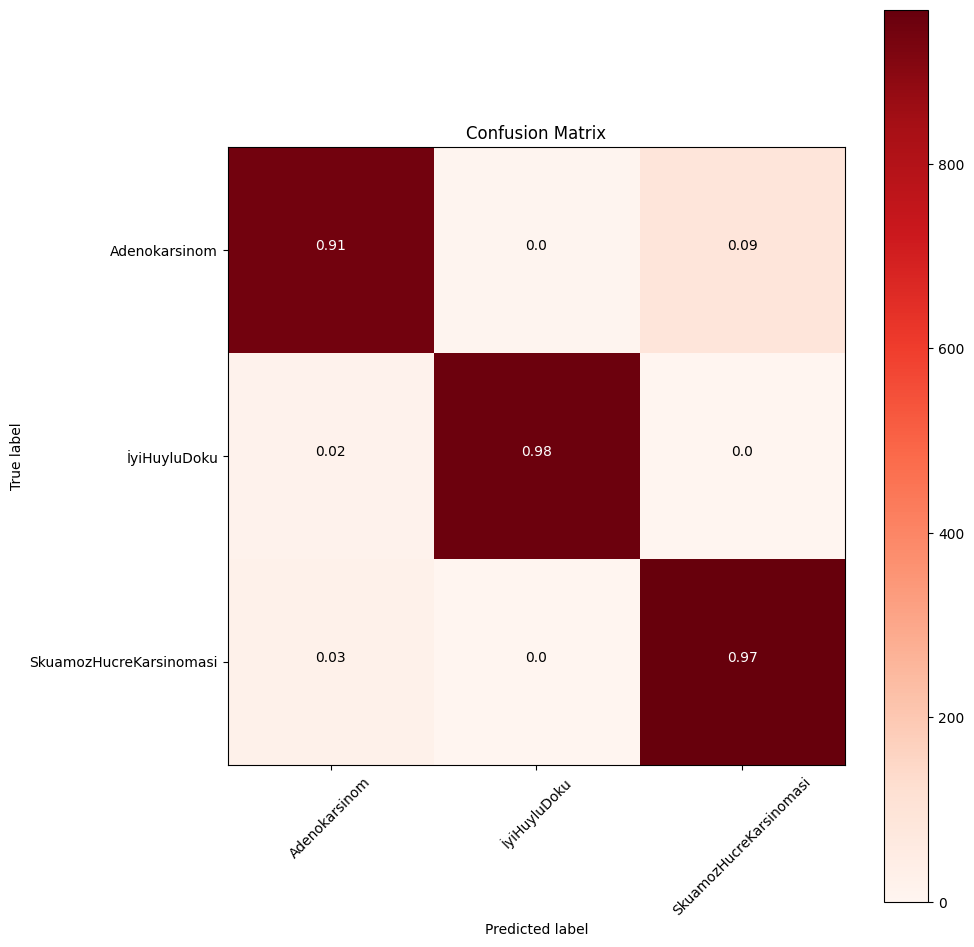

In [ ]:
#Değerlendirme skorlarının belirlenmesi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from keras.utils import to_categorical
def evaluate_model(model, x_test, y_test):
    # Accuracy Score
    y_pred = model.predict(x_test)
    y_test_encoded = to_categorical(y_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test_encoded, axis=1)


    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    print(f"Accuracy: {accuracy}")

    # Precision Score
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"Precision: {precision}")

    # Recall Score
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"Recall: {recall}")

    # F1 Score
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"F1-Score: {f1}")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    classes = ["Adenokarsinom","İyiHuyluDoku","SkuamozHucreKarsinomasi"]
    plot_confusion_matrix(cm, classes, title='Confusion Matrix')

#Modelin değerlendirilmesi
evaluate_model(model, x_test, y_test)

#Transfer Learning

In [ ]:
#Transfer Learning modelinin tanımlanması
res=tf.keras.applications.ResNet50V2(
    input_shape=(100,100,3),
    include_top=False
)

res.trainable=False

94668760/94668760 [==============================] - 2s 0us/step


In [ ]:
#Modelin oluşturulması
res_model=Sequential()
res_model.add(res)
res_model.add(Dropout(0.25))
res_model.add(MaxPooling2D())
res_model.add(Flatten())
res_model.add(Dense(256,activation='relu'))
res_model.add(BatchNormalization())
res_model.add(Dropout(0.5))
res_model.add(Dense(3,activation='softmax'))

In [ ]:
#Modelin derlenmesi
res_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Modelin eğitilmesi
hist=res_model.fit(x_train,train_yCl,
                   batch_size=128,
                   epochs=10,
                   validation_data=(x_val,valid_yCl)
                   )

Epoch 1/10
85/85 [==============================] - 21s 163ms/step - loss: 0.4778 - accuracy: 0.8209 - val_loss: 3.6756 - val_accuracy: 0.6125
Epoch 2/10
85/85 [==============================] - 8s 97ms/step - loss: 0.3396 - accuracy: 0.8652 - val_loss: 0.8799 - val_accuracy: 0.6550
Epoch 3/10
85/85 [==============================] - 8s 97ms/step - loss: 0.3050 - accuracy: 0.8791 - val_loss: 0.5889 - val_accuracy: 0.7617
Epoch 4/10
85/85 [==============================] - 8s 95ms/step - loss: 0.2850 - accuracy: 0.8873 - val_loss: 1.3408 - val_accuracy: 0.6992
Epoch 5/10
85/85 [==============================] - 9s 102ms/step - loss: 0.2696 - accuracy: 0.8901 - val_loss: 0.9997 - val_accuracy: 0.7100
Epoch 6/10
85/85 [==============================] - 8s 99ms/step - loss: 0.2661 - accuracy: 0.8951 - val_loss: 0.9607 - val_accuracy: 0.6742
Epoch 7/10
85/85 [==============================] - 9s 101ms/step - loss: 0.2589 - accuracy: 0.8944 - val_loss: 1.6785 - val_accuracy: 0.6192
Epoch 8/1

In [ ]:
#Değerlendirme skorlarının belirlenmesi
score_train_RESNET=res_model.evaluate(x_train,train_yCl)
print("Train Accuracy:",score_train_RESNET[1])

score_test_RESNET=res_model.evaluate(x_test,test_yCl)
print("Test Accuracy:",score_test_RESNET[1])

score_val_RESNET=res_model.evaluate(x_val,valid_yCl)
print("Validation Accuracy:",score_val_RESNET[1])

338/338 [==============================] - 12s 31ms/step - loss: 1.8762 - accuracy: 0.5768
Train Accuracy: 0.5767592787742615
94/94 [==============================] - 4s 43ms/step - loss: 1.9832 - accuracy: 0.5653
Test Accuracy: 0.5653333067893982
38/38 [==============================] - 1s 28ms/step - loss: 1.6874 - accuracy: 0.6058
Validation Accuracy: 0.6058333516120911


In [ ]:
#Karmaşıklık matrisi için gerekli grafiğin oluşturulması
import itertools

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

94/94 [==============================] - 7s 32ms/step
Accuracy: 0.5653333333333334
Precision: 0.7852681346354893
Recall: 0.5653333333333334
F1-Score: 0.4865058221956747
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.03      0.07      1037
           1       1.00      0.69      0.81       970
           2       0.43      1.00      0.60       993

    accuracy                           0.57      3000
   macro avg       0.78      0.57      0.50      3000
weighted avg       0.79      0.57      0.49      3000



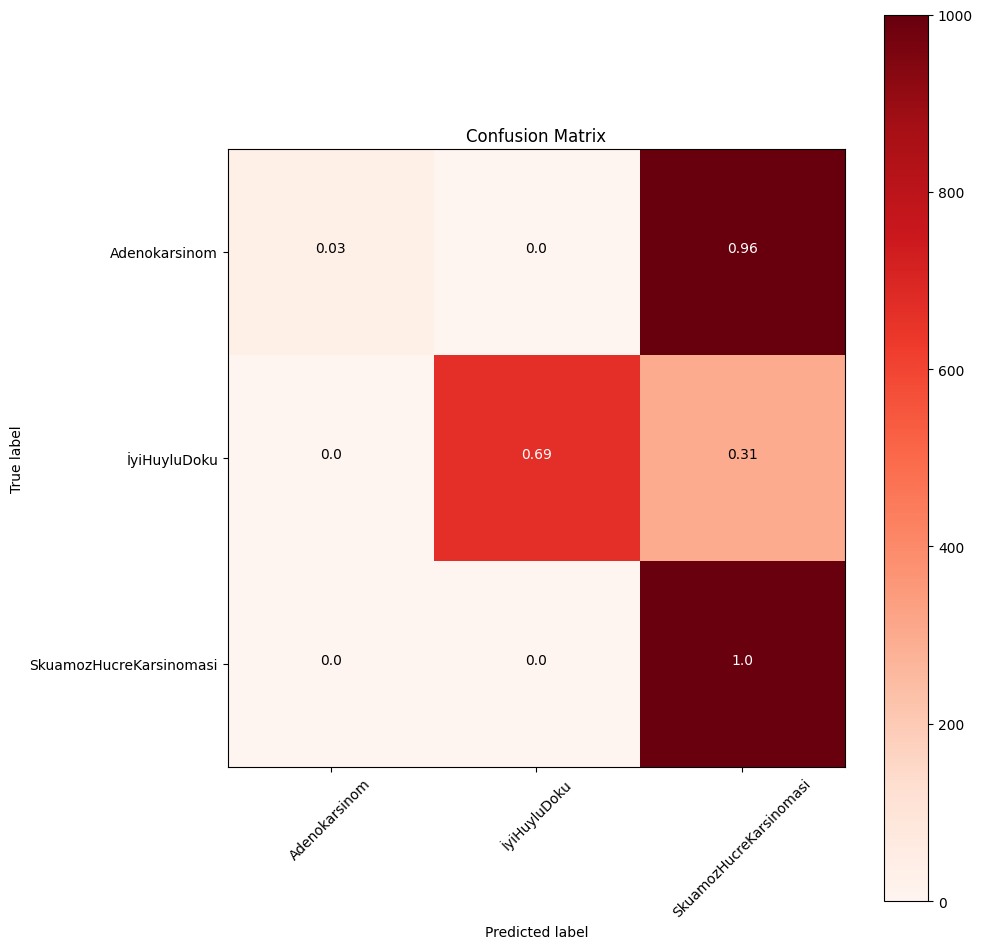

In [ ]:
#Değerlendirme skorlarının belirlenmesi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from keras.utils import to_categorical
def evaluate_model(res_model, x_test, y_test):
    # Accuracy Score
    y_pred = res_model.predict(x_test)
    y_test_encoded = to_categorical(y_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test_encoded, axis=1)


    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    print(f"Accuracy: {accuracy}")

    # Precision Score
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"Precision: {precision}")

    # Recall Score
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"Recall: {recall}")

    # F1 Score
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"F1-Score: {f1}")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    classes = ["Adenokarsinom","İyiHuyluDoku","SkuamozHucreKarsinomasi"]
    plot_confusion_matrix(cm, classes, title='Confusion Matrix')

# Modelin değerlendirilmesi
evaluate_model(res_model, x_test, y_test)

# Veri Seti Ayrımı

In [ ]:
#Verilerin %70 - %30 olarak ayrılması
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [ ]:
#Verilerin boyutlarının şekillendirilmesi
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [ ]:
#Verilerin boyutlarının yazdırılması
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(9450, 100, 100, 3)
(4500, 100, 100, 3)
(1050, 100, 100, 3)
(9450,)
(4500,)
(1050,)


In [ ]:
#Verilerin kategorize edilmesi
import tensorflow as tf

train_yCl = tf.keras.utils.to_categorical(y_train, num_classes=3)
test_yCl = tf.keras.utils.to_categorical(y_test, num_classes=3)
valid_yCl = tf.keras.utils.to_categorical(y_val, num_classes=3)

In [ ]:
#Modelin oluşturulması
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(64, (3,3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()
#Modelin derlenmesi
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor = 'val_accuracy', save_best_only=True, verbose=3
    ),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=3)
]

In [ ]:
#Modelin eğitilmesi
history = model.fit(x_train, train_yCl,
                    batch_size=64,
                    validation_data = (x_val, valid_yCl),
                    callbacks = callback_list,
                    epochs = 20
                    )

Epoch 1/20
148/148 [==============================] - ETA: 0s - loss: 0.6011 - accuracy: 0.8643
Epoch 1: val_accuracy improved from -inf to 0.62857, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


148/148 [==============================] - 22s 152ms/step - loss: 0.6011 - accuracy: 0.8643 - val_loss: 0.9752 - val_accuracy: 0.6286
Epoch 2/20
148/148 [==============================] - ETA: 0s - loss: 0.1593 - accuracy: 0.9392
Epoch 2: val_accuracy improved from 0.62857 to 0.92476, saving model to model.h5
148/148 [==============================] - 19s 129ms/step - loss: 0.1593 - accuracy: 0.9392 - val_loss: 0.1856 - val_accuracy: 0.9248
Epoch 3/20
148/148 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.9574
Epoch 3: val_accuracy did not improve from 0.92476
148/148 [==============================] - 18s 119ms/step - loss: 0.1096 - accuracy: 0.9574 - val_loss: 1.3725 - val_accuracy: 0.6295
Epoch 4/20
148/148 [==============================] - ETA: 0s - loss: 0.0983 - accuracy: 0.9654
Epoch 4: val_accuracy did not improve from 0.92476
148/148 [==============================] - 18s 122ms/step - loss: 0.0983 - accuracy: 0.9654 - val_loss: 0.4773 - val_accuracy: 

In [ ]:
#Eğitim,test ve validation skorlarının doğruluk değerinin hesaplanması
score_valid = model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_valid[1])

score_test = model.evaluate(x_test, test_yCl)
print("Validation Accuracy: ", score_test[1])

score_train = model.evaluate(x_train, train_yCl)
print("Validation Accuracy: ", score_train[1])

33/33 [==============================] - 1s 15ms/step - loss: 0.2488 - accuracy: 0.9571
Validation Accuracy:  0.9571428298950195
141/141 [==============================] - 4s 26ms/step - loss: 0.2305 - accuracy: 0.9538
Validation Accuracy:  0.9537777900695801
296/296 [==============================] - 5s 16ms/step - loss: 0.0318 - accuracy: 0.9891
Validation Accuracy:  0.9891005158424377


141/141 [==============================] - 2s 12ms/step
Accuracy: 0.9537777777777777
Precision: 0.9577834140675471
Recall: 0.9537777777777777
F1-Score: 0.9535038172837829
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1524
           1       0.99      1.00      1.00      1492
           2       0.89      0.99      0.94      1484

    accuracy                           0.95      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.96      0.95      0.95      4500



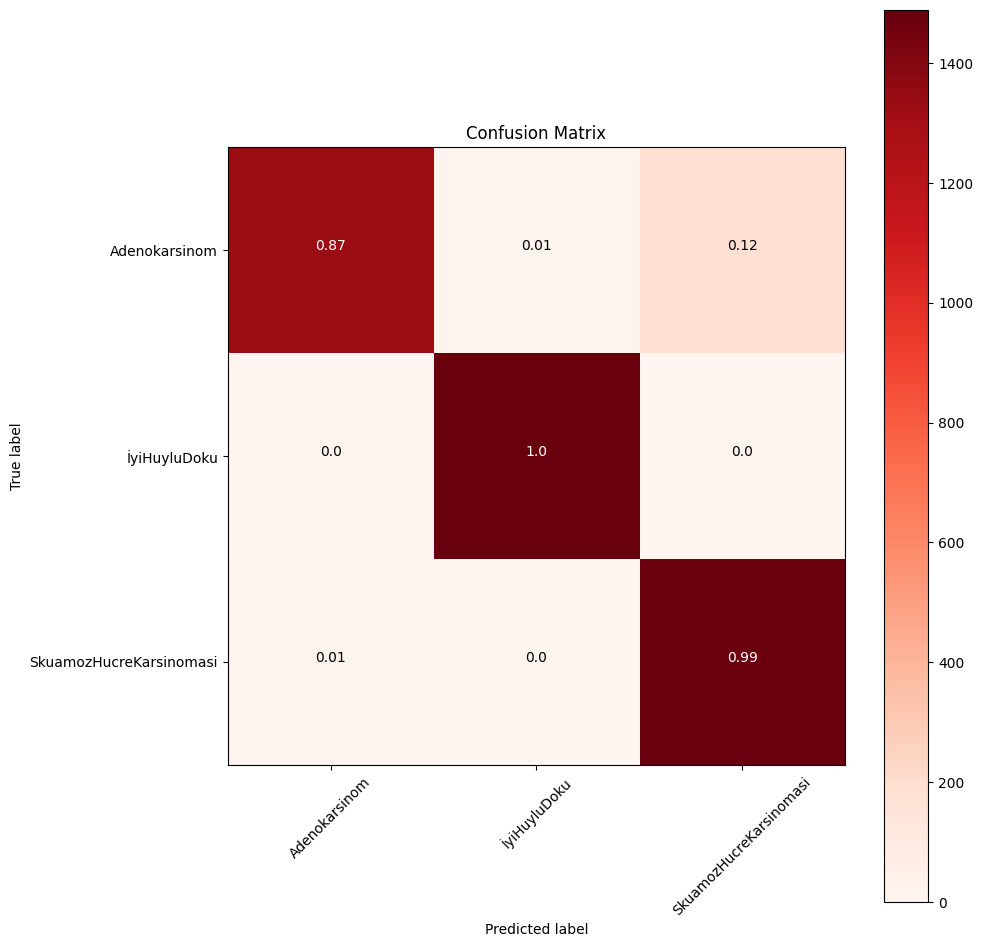

In [ ]:
#Değerlendirme skorlarının belirlenmesi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from keras.utils import to_categorical
def evaluate_model(model, x_test, y_test):
    # Accuracy Score
    y_pred = model.predict(x_test)
    y_test_encoded = to_categorical(y_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test_encoded, axis=1)


    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    print(f"Accuracy: {accuracy}")

    # Precision Score
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"Precision: {precision}")

    # Recall Score
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"Recall: {recall}")

    # F1 Score
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"F1-Score: {f1}")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    classes = ["Adenokarsinom","İyiHuyluDoku","SkuamozHucreKarsinomasi"]
    plot_confusion_matrix(cm, classes, title='Confusion Matrix')

# Modelin değerlendirilmesi
evaluate_model(model, x_test, y_test)

# Transfer Learning

In [ ]:
#Modelin tanımlanması
res=tf.keras.applications.ResNet50V2(
    input_shape=(100,100,3),
    include_top=False
)

res.trainable=False

In [ ]:
#Modelin oluşturulması
res_model=Sequential()
res_model.add(res)
res_model.add(Dropout(0.25))
res_model.add(MaxPooling2D())
res_model.add(Flatten())
res_model.add(Dense(256,activation='relu'))
res_model.add(BatchNormalization())
res_model.add(Dropout(0.5))
res_model.add(Dense(3,activation='softmax'))

In [ ]:
#Modelin derlenmesi
res_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Modelin eğitilmesi
hist=res_model.fit(x_train,train_yCl,
                   batch_size=128,
                   epochs=10,
                   validation_data=(x_val,valid_yCl)
                   )

Epoch 1/10
74/74 [==============================] - 15s 138ms/step - loss: 0.4626 - accuracy: 0.8234 - val_loss: 1.2969 - val_accuracy: 0.5952
Epoch 2/10
74/74 [==============================] - 7s 98ms/step - loss: 0.3385 - accuracy: 0.8665 - val_loss: 0.2660 - val_accuracy: 0.9105
Epoch 3/10
74/74 [==============================] - 8s 104ms/step - loss: 0.3072 - accuracy: 0.8781 - val_loss: 0.9358 - val_accuracy: 0.6857
Epoch 4/10
74/74 [==============================] - 7s 97ms/step - loss: 0.2848 - accuracy: 0.8851 - val_loss: 0.6994 - val_accuracy: 0.7324
Epoch 5/10
74/74 [==============================] - 7s 96ms/step - loss: 0.2772 - accuracy: 0.8898 - val_loss: 1.5955 - val_accuracy: 0.5724
Epoch 6/10
74/74 [==============================] - 7s 96ms/step - loss: 0.2703 - accuracy: 0.8926 - val_loss: 0.8224 - val_accuracy: 0.7124
Epoch 7/10
74/74 [==============================] - 7s 95ms/step - loss: 0.2712 - accuracy: 0.8892 - val_loss: 1.0886 - val_accuracy: 0.6819
Epoch 8/10

In [ ]:
#Doğruluk skorlarının belirlenmesi
score_train_RESNET=res_model.evaluate(x_train,train_yCl)
print("Train Accuracy:",score_train_RESNET[1])

score_test_RESNET=res_model.evaluate(x_test,test_yCl)
print("Test Accuracy:",score_train_RESNET[1])

score_val_RESNET=res_model.evaluate(x_val,valid_yCl)
print("Validation Accuracy:",score_val_RESNET[1])

296/296 [==============================] - 9s 31ms/step - loss: 1.1304 - accuracy: 0.6652
Train Accuracy: 0.6651852130889893
141/141 [==============================] - 5s 35ms/step - loss: 1.2005 - accuracy: 0.6644
Test Accuracy: 0.6651852130889893
33/33 [==============================] - 1s 27ms/step - loss: 1.1467 - accuracy: 0.6648
Validation Accuracy: 0.6647619009017944


141/141 [==============================] - 4s 25ms/step
Accuracy: 0.6644444444444444
Precision: 0.8183061674892661
Recall: 0.6644444444444444
F1-Score: 0.6116466007113779
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.15      0.25      1524
           1       1.00      0.86      0.93      1492
           2       0.50      1.00      0.66      1484

    accuracy                           0.66      4500
   macro avg       0.82      0.67      0.61      4500
weighted avg       0.82      0.66      0.61      4500



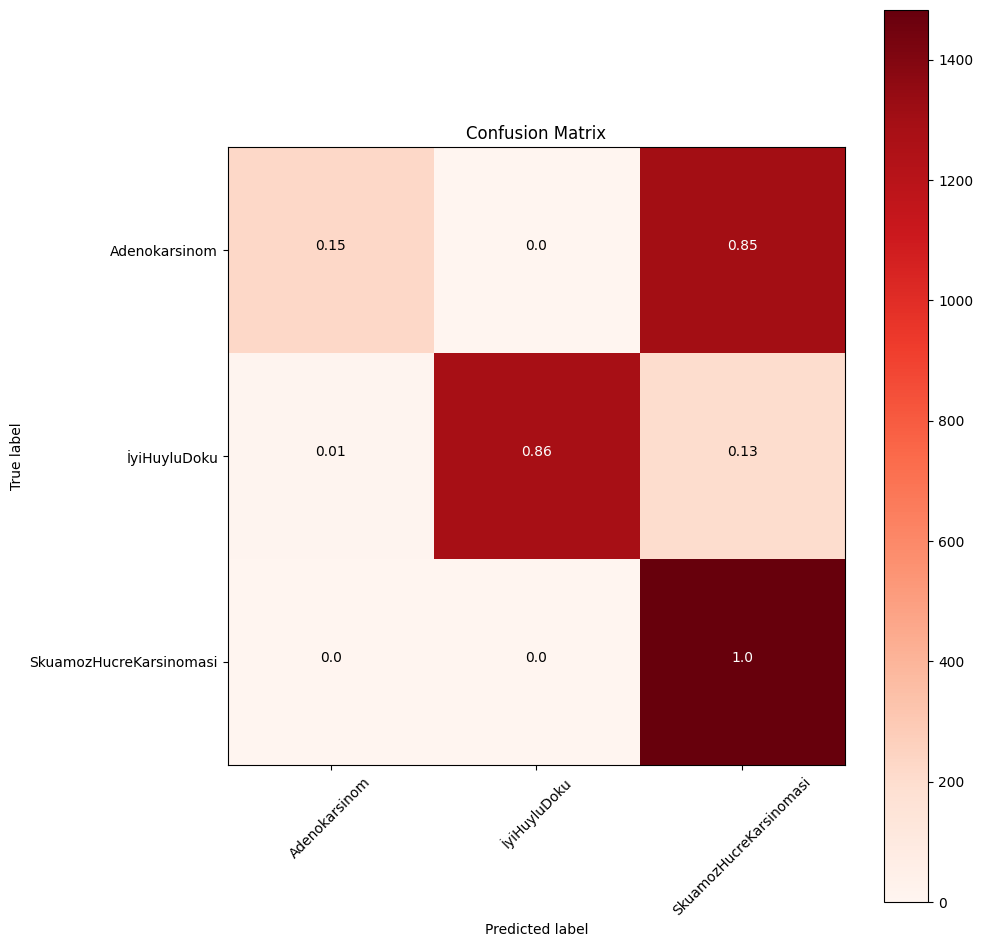

In [ ]:
#Değerlendirme skorlarının belirlenmesi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from keras.utils import to_categorical
def evaluate_model(res_model, x_test, y_test):
    # Accuracy Score
    y_pred = res_model.predict(x_test)
    y_test_encoded = to_categorical(y_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test_encoded, axis=1)


    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    print(f"Accuracy: {accuracy}")

    # Precision Score
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"Precision: {precision}")

    # Recall Score
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"Recall: {recall}")

    # F1 Score
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    print(f"F1-Score: {f1}")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    classes = ["Adenokarsinom","İyiHuyluDoku","SkuamozHucreKarsinomasi"]
    plot_confusion_matrix(cm, classes, title='Confusion Matrix')

# Modelin değerlendirilmesi
evaluate_model(res_model, x_test, y_test)